In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

In [3]:
df=pd.read_csv('data/MaunaLoaDailyTemps-1.csv',index_col='DATE',parse_dates=True)

In [4]:
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MinTemp  1821 non-null   float64
 1   MaxTemp  1821 non-null   float64
 2   AvgTemp  1821 non-null   float64
 3   Sunrise  1825 non-null   int64  
 4   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 85.5 KB


In [6]:
df.dropna(inplace=True)

<Axes: xlabel='DATE'>

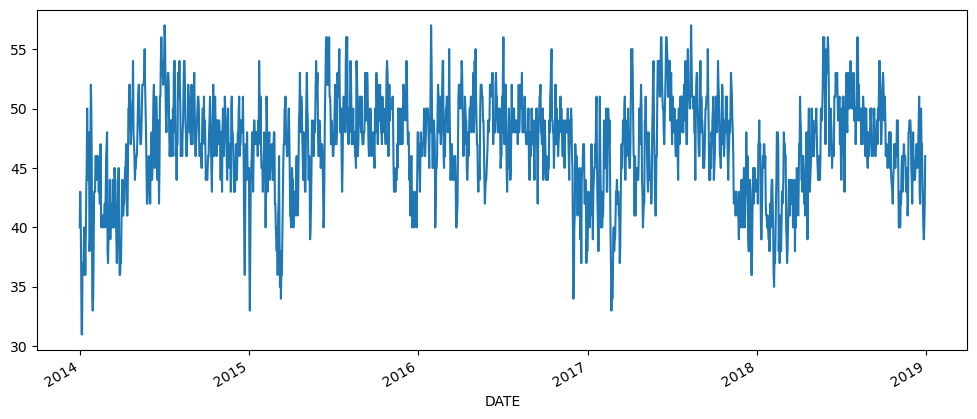

In [7]:
df['AvgTemp'].plot(figsize=(12,5))

In [8]:
from statsmodels.tsa.stattools import adfuller

def ad_test(df):
  dftest=adfuller(df,autolag='AIC')
  print('1.Test Statistic')
  print(dftest[0])
  print('2.P-Value')
  print(dftest[1])
  print('3.Num of Lags')
  print(dftest[2])
  print('4.Num of Observations Used for ADF Regression and Critical Values Calculation')
  print(dftest[3])
  print('5.Critical Values')
  print(dftest[4])


In [9]:
ad_test(df['AvgTemp'])

1.Test Statistic
-6.554680125068774
2.P-Value
8.67593748019975e-09
3.Num of Lags
12
4.Num of Observations Used for ADF Regression and Critical Values Calculation
1808
5.Critical Values
{'1%': -3.433972018026501, '5%': -2.8631399192826676, '10%': -2.5676217442756872}


In [10]:
from pmdarima import auto_arima

In [11]:
stepwise_fit=auto_arima(df['AvgTemp'],suppress_warnings=True)
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.528
Date:                Sun, 22 Sep 2024   AIC                           8295.056
Time:                        11:04:25   BIC                           8339.113
Sample:                             0   HQIC                          8311.310
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2539      0.370      3.389      0.001       0.529       1.979
ar.L1          0.9730      0.008    122.060      0.000       0.957       0.989
ma.L1         -0.1288      0.024     -5.443      0.000      -0.175      -0.082
ma.L2         -0.2187      0.024     -9.076      0.000      -0.266      -0.172
ma.L3         -0.2039      0.024     -8.543      0.000      -0.251      -0.157
ma.L4         -0.1350      0.023     -5.939      0.000      -0.180      -0.090
ma.L5         -0.0468      0.024     -1.924      0.054      -0.094       0.001
sigma2         5.4802      0.171     32.054      0.000       5.145       5.815
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                20.54
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape)
print(test.shape)

(1791, 5)
(30, 5)


In [13]:
from statsmodels.tsa.arima.model import ARIMA

In [14]:
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()

c:\Users\Dell\Desktop\TSA\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dell\Desktop\TSA\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dell\Desktop\TSA\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Sun, 22 Sep 2024   AIC                           8156.395
Time:                        11:04:26   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
pred = model.forecast(steps=len(test))
pred.index=df.index[len(train):len(train)+len(test)]

c:\Users\Dell\Desktop\TSA\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Dell\Desktop\TSA\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [19]:
print(pred)

DATE
2018-12-01    44.754109
2018-12-02    44.987795
2018-12-03    45.388741
2018-12-04    45.721545
2018-12-05    45.863733
2018-12-06    45.874126
2018-12-07    45.884370
2018-12-08    45.894466
2018-12-09    45.904417
2018-12-10    45.914225
2018-12-11    45.923891
2018-12-12    45.933418
2018-12-13    45.942809
2018-12-14    45.952063
2018-12-15    45.961185
2018-12-16    45.970175
2018-12-17    45.979036
2018-12-18    45.987770
2018-12-19    45.996377
2018-12-20    46.004861
2018-12-21    46.013222
2018-12-22    46.021463
2018-12-23    46.029586
2018-12-24    46.037591
2018-12-25    46.045481
2018-12-26    46.053258
2018-12-27    46.060923
2018-12-28    46.068477
2018-12-29    46.075923
2018-12-30    46.083261
Name: predicted_mean, dtype: float64


In [22]:
start=len(train)
end=len(train)+len(test)-1
pred.index=df.index[start:end+1]
pred

DATE
2018-12-01    44.754109
2018-12-02    44.987795
2018-12-03    45.388741
2018-12-04    45.721545
2018-12-05    45.863733
2018-12-06    45.874126
2018-12-07    45.884370
2018-12-08    45.894466
2018-12-09    45.904417
2018-12-10    45.914225
2018-12-11    45.923891
2018-12-12    45.933418
2018-12-13    45.942809
2018-12-14    45.952063
2018-12-15    45.961185
2018-12-16    45.970175
2018-12-17    45.979036
2018-12-18    45.987770
2018-12-19    45.996377
2018-12-20    46.004861
2018-12-21    46.013222
2018-12-22    46.021463
2018-12-23    46.029586
2018-12-24    46.037591
2018-12-25    46.045481
2018-12-26    46.053258
2018-12-27    46.060923
2018-12-28    46.068477
2018-12-29    46.075923
2018-12-30    46.083261
Name: predicted_mean, dtype: float64

<Axes: xlabel='DATE'>

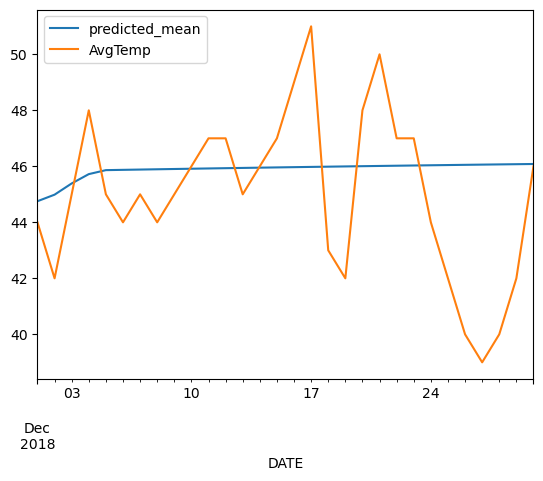

In [23]:
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)